# KNN, PLS, PDA algorithms

<img src="https://cdn.lynda.com/course/645050/645050-637305902658808094-16x9.jpg">

<p>The k-nearest neighbors algorithm, or kNN, is one of the simplest machine learning algorithms. Usually, k is a small, odd number - sometimes only 1. The larger k is, the more accurate the classification will be, but the longer it takes to perform the classification.<br>
Let’s say you want to classify an object into one of several classes -- for example, "pictures containing a face" and "pictures not containing a face". You do this by looking at the k elements of the training set that are closest to the one you want to classify, and letting them vote by majority on what that object’s class should be. If two of your closest elements were in class A and only one in class B, and k = 3, then you would conclude the element that are you trying to classify would go in class A. "Closest" here refers to literal distance in n-dimensional space, or the Euclidean distance.<br>
There's also something called weighted kNN, which is like kNN except neighbors that are closer count as stronger votes. If there is one example of class A, and two examples of class B that are farther away, the algorithm still might classify the input as class A.
</p>
<p>
Partial least squares regression (PLS regression) is a statistical method that bears some relation to principal components regression; instead of finding hyperplanes of maximum variance between the response and independent variables, it finds a linear regression model by projecting the predicted variables and the observable variables to a new space. Because both the X and Y data are projected to new spaces, the PLS family of methods are known as bilinear factor models. Partial least squares discriminant analysis (PLS-DA) is a variant used when the Y is categorical.<br>
PLS is used to find the fundamental relations between two matrices (X and Y), i.e. a latent variable approach to modeling the covariance structures in these two spaces. A PLS model will try to find the multidimensional direction in the X space that explains the maximum multidimensional variance direction in the Y space. PLS regression is particularly suited when the matrix of predictors has more variables than observations, and when there is multicollinearity among X values. By contrast, standard regression will fail in these cases (unless it is regularized).<br>
 Partial least squares was introduced by the Swedish statistician Herman O. A. Wold, who then developed it with his son, Svante Wold. An alternative term for PLS (and more correct according to Svante Wold) is projection to latent structures, but the term partial least squares is still dominant in many areas. Although the original applications were in the social sciences, PLS regression is today most widely used in chemometrics and related areas. It is also used in bioinformatics, sensometrics, neuroscience, and anthropology.
</p>

<p>Here we are going to implement KNN, PLS and PDA using Telecom Churn Dataset.</p>

## 0. Loading required libraries 

In [3]:
library(DBI)
library(corrgram)
library(caret) 
library(gridExtra)
library(ggpubr)

## 1. Setting up the code parallelizing

<p>Today is a good practice to start parallelizing your code. The common motivation behind parallel computing is that something is taking too long time. For somebody that means any computation that takes more than 3 minutes – this because parallelization is incredibly simple and most tasks that take time are embarrassingly parallel. Here are a few common tasks that fit the description:
    <ul>
        <li>Bootstrapping</li>
        <li>Cross-validation</li>
        <li>Multivariate Imputation by Chained Equations (MICE)</li>
        <li>Fitting multiple regression models</li>
    </ul>
You can find out more about parallelizing your computations in R - <a href="http://gforge.se/2015/02/how-to-go-parallel-in-r-basics-tips/">here</a>.
</p>

<h3>For Windows users</h3>

In [ ]:
# process in parallel on Windows
library(doParallel) 
cl <- makeCluster(detectCores(), type='PSOCK')
registerDoParallel(cl)

<h3>For Mac OSX and Unix like systems users</h3>

In [6]:
# process in parallel on Mac OSX and UNIX like systems
library(doMC)
registerDoMC(cores = 4)

## 2. Importing Data

In [8]:
#Set working directory where CSV is located

#getwd()
#setwd("...YOUR WORKING DIRECTORY WITH A DATASET...")
#getwd()

In [7]:
# Load the DataSets: 
dataSet <- read.csv("TelcoCustomerChurnDataset.csv", header = TRUE, sep = ',')
colnames(dataSet) #Check the dataframe column names

[1] "Account_Length" "Vmail_Message"  "Day_Mins"       "Eve_Mins"      
 [5] "Night_Mins"     "Intl_Mins"      "CustServ_Calls" "Churn"         
 [9] "Intl_Plan"      "Vmail_Plan"     "Day_Calls"      "Day_Charge"    
[13] "Eve_Calls"      "Eve_Charge"     "Night_Calls"    "Night_Charge"  
[17] "Intl_Calls"     "Intl_Charge"    "State"          "Area_Code"     
[21] "Phone"

## 3. Exploring the dataset

In [8]:
# Print top 10 rows in the dataSet
head(dataSet, 10)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,⋯,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>,⋯,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<fct>,<int>,<fct>
1,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,⋯,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
2,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,⋯,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
3,137,0,243.4,121.2,162.6,12.2,0,no,no,no,⋯,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
4,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,⋯,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
5,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,⋯,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
6,118,0,223.4,220.6,203.9,6.3,0,no,yes,no,⋯,37.98,101,18.75,118,9.18,6,1.70,AL,510,391-8027
7,121,24,218.2,348.5,212.6,7.5,3,no,no,yes,⋯,37.09,108,29.62,118,9.57,7,2.03,MA,510,355-9993
8,147,0,157.0,103.1,211.8,7.1,0,no,yes,no,⋯,26.69,94,8.76,96,9.53,6,1.92,MO,415,329-9001
9,117,0,184.5,351.6,215.8,8.7,1,no,no,no,⋯,31.37,80,29.89,90,9.71,4,2.35,LA,408,335-4719


In [9]:
# Print last 10 rows in the dataSet
tail(dataSet, 10)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,⋯,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>,⋯,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<fct>,<int>,<fct>
3324,117,0,118.4,249.3,227.0,13.6,5,yes,no,no,⋯,20.13,97,21.19,56,10.22,3,3.67,IN,415,362-5899
3325,159,0,169.8,197.7,193.7,11.6,1,no,no,no,⋯,28.87,105,16.80,82,8.72,4,3.13,WV,415,377-1164
3326,78,0,193.4,116.9,243.3,9.3,2,no,no,no,⋯,32.88,88,9.94,109,10.95,4,2.51,OH,408,368-8555
3327,96,0,106.6,284.8,178.9,14.9,1,no,no,no,⋯,18.12,87,24.21,92,8.05,7,4.02,OH,415,347-6812
3328,79,0,134.7,189.7,221.4,11.8,2,no,no,no,⋯,22.90,68,16.12,128,9.96,5,3.19,SC,415,348-3830
3329,192,36,156.2,215.5,279.1,9.9,2,no,no,yes,⋯,26.55,126,18.32,83,12.56,6,2.67,AZ,415,414-4276
3330,68,0,231.1,153.4,191.3,9.6,3,no,no,no,⋯,39.29,55,13.04,123,8.61,4,2.59,WV,415,370-3271
3331,28,0,180.8,288.8,191.9,14.1,2,no,no,no,⋯,30.74,58,24.55,91,8.64,6,3.81,RI,510,328-8230
3332,184,0,213.8,159.6,139.2,5.0,2,no,yes,no,⋯,36.35,84,13.57,137,6.26,10,1.35,CT,510,364-6381


In [10]:
# Dimention of Dataset
dim(dataSet)

[1] 3333   21

In [11]:
# Check Data types of each column
table(unlist(lapply(dataSet, class)))


 factor integer numeric 
      5       8       8 

In [12]:
# Check Data types of individual column
data.class(dataSet$Account_Length) 
data.class(dataSet$Vmail_Message) 
data.class(dataSet$Day_Mins)
data.class(dataSet$Eve_Mins)
data.class(dataSet$Night_Mins) 
data.class(dataSet$Intl_Mins)
data.class(dataSet$CustServ_Calls)
data.class(dataSet$Intl_Plan) 
data.class(dataSet$Vmail_Plan)
data.class(dataSet$Day_Calls)
data.class(dataSet$Day_Charge) 
data.class(dataSet$Eve_Calls)
data.class(dataSet$Eve_Charge) 
data.class(dataSet$Night_Calls)
data.class(dataSet$Night_Charge)
data.class(dataSet$Intl_Calls) 
data.class(dataSet$Intl_Charge)
data.class(dataSet$State) 
data.class(dataSet$Phone)
data.class(dataSet$Churn)

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "factor"

[1] "factor"

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "factor"

[1] "factor"

[1] "factor"

<h4>Converting variables <i>Intl_Plan, Vmail_Plan, State</i> to numeric data type.</h4>

In [13]:
dataSet$Intl_Plan <- as.numeric(dataSet$Intl_Plan)
dataSet$Vmail_Plan <- as.numeric(dataSet$Vmail_Plan)
dataSet$State <- as.numeric(dataSet$State)

In [14]:
# Check Data types of each column
table(unlist(lapply(dataSet, class)))


 factor integer numeric 
      2       8      11 

## 4. Exploring or Summarising dataset with descriptive statistics

In [15]:
# Find out if there is missing value in rows
rowSums(is.na(dataSet))

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [667] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [815] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [852] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [889] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [926] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [963] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1000] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1037] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1074] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1111] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1148] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1185] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1222] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1259] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1296] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1333] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1370] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1407] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1444] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1481] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1518] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1555] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1592] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1629] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1666] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1703] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1740] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1777] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1814] 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [16]:
# Find out if there is missing value in columns
colSums(is.na(dataSet))

Account_Length  Vmail_Message       Day_Mins       Eve_Mins     Night_Mins 
             0              0              0              0              0 
     Intl_Mins CustServ_Calls          Churn      Intl_Plan     Vmail_Plan 
             0              0              0              0              0 
     Day_Calls     Day_Charge      Eve_Calls     Eve_Charge    Night_Calls 
             0              0              0              0              0 
  Night_Charge     Intl_Calls    Intl_Charge          State      Area_Code 
             0              0              0              0              0 
         Phone 
             0

<h3>Missing value checking using different packages (<i>mice</i> and <i>VIM</i>)</h3>


Attaching package: ‘mice’


The following objects are masked from ‘package:base’:

    cbind, rbind




 /\     /\
{  `---'  }
{  O   O  }
==>  V <==  No need for mice. This data set is completely observed.
 \  \|/  /
  `-----'



,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,⋯,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone,
3333,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,0
,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


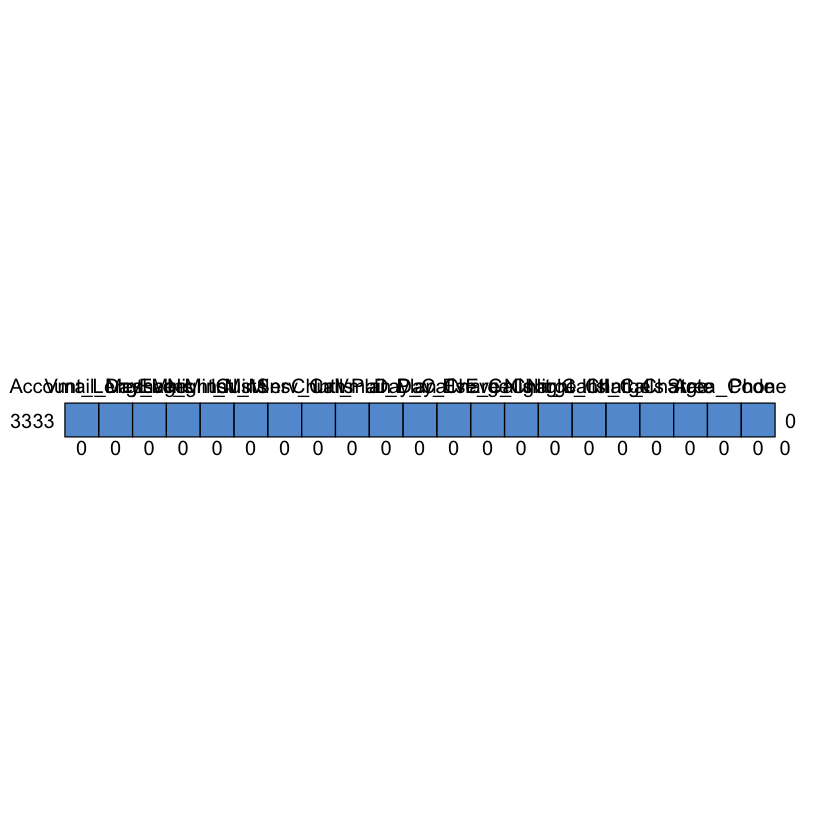

In [17]:
#Checking missing value with the mice package
library(mice)
md.pattern(dataSet)

Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: ‘VIM’


The following object is masked from ‘package:datasets’:

    sleep





 Variables sorted by number of missings: 
       Variable Count
 Account_Length     0
  Vmail_Message     0
       Day_Mins     0
       Eve_Mins     0
     Night_Mins     0
      Intl_Mins     0
 CustServ_Calls     0
          Churn     0
      Intl_Plan     0
     Vmail_Plan     0
      Day_Calls     0
     Day_Charge     0
      Eve_Calls     0
     Eve_Charge     0
    Night_Calls     0
   Night_Charge     0
     Intl_Calls     0
    Intl_Charge     0
          State     0
      Area_Code     0
          Phone     0


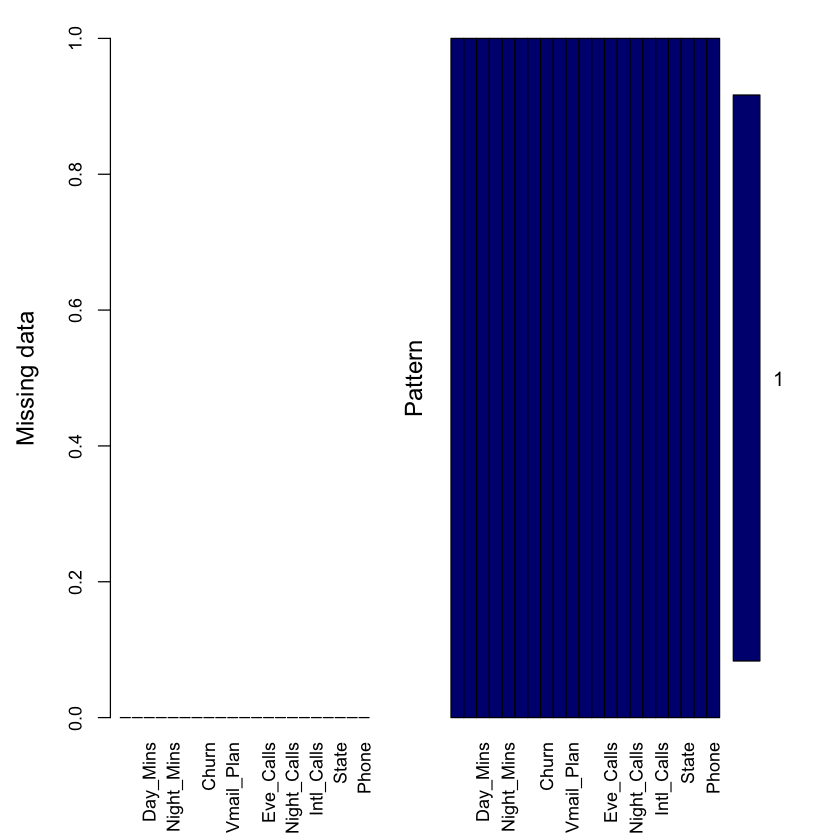

In [18]:
#Checking missing value with the VIM package
library(VIM)
mice_plot <- aggr(dataSet, col=c('navyblue','yellow'),
                  numbers=TRUE, sortVars=TRUE,
                  labels=names(dataSet[1:21]), cex.axis=.9,
                  gap=3, ylab=c("Missing data","Pattern"))

<p>After the observation, we can claim that dataset contains no missing values.</p>

<h3>Summary of dataset</h3>

In [19]:
# Selecting just columns with numeric data type
numericalCols <- colnames(dataSet[c(1:7,9:20)])

<p>Difference between the <b>lapply</b> and <b>sapply</b> functions <i>(we will use them in the next 2 cells)</i>:<br>
We use <b>lapply</b> - when we want to apply a function to each element of a <i>list</i> in turn and get a <i>list back</i>.<br>
We use <b>sapply</b> - when we want to apply a function to each element of a <i>list</i> in turn, but we want a <i>vector back</i>, rather than a list.<br>
</p>

<h4>Finding statistics metrics with <i>lapply</i> function</h4>

In [20]:
#Sum
lapply(dataSet[numericalCols], FUN = sum)

$Account_Length
[1] 336849

$Vmail_Message
[1] 26994

$Day_Mins
[1] 599190.4

$Eve_Mins
[1] 669867.5

$Night_Mins
[1] 669506.5

$Intl_Mins
[1] 34120.9

$CustServ_Calls
[1] 5209

$Intl_Plan
[1] 3656

$Vmail_Plan
[1] 4255

$Day_Calls
[1] 334752

$Day_Charge
[1] 101864.2

$Eve_Calls
[1] 333681

$Eve_Charge
[1] 56939.44

$Night_Calls
[1] 333659

$Night_Charge
[1] 30128.07

$Intl_Calls
[1] 14930

$Intl_Charge
[1] 9214.35

$State
[1] 90189

$Area_Code
[1] 1457129

In [21]:
#Mean
lapply(dataSet[numericalCols], FUN = mean)

$Account_Length
[1] 101.0648

$Vmail_Message
[1] 8.09901

$Day_Mins
[1] 179.7751

$Eve_Mins
[1] 200.9803

$Night_Mins
[1] 200.872

$Intl_Mins
[1] 10.23729

$CustServ_Calls
[1] 1.562856

$Intl_Plan
[1] 1.09691

$Vmail_Plan
[1] 1.276628

$Day_Calls
[1] 100.4356

$Day_Charge
[1] 30.56231

$Eve_Calls
[1] 100.1143

$Eve_Charge
[1] 17.08354

$Night_Calls
[1] 100.1077

$Night_Charge
[1] 9.039325

$Intl_Calls
[1] 4.479448

$Intl_Charge
[1] 2.764581

$State
[1] 27.05941

$Area_Code
[1] 437.1824

In [22]:
#median
lapply(dataSet[numericalCols], FUN = median)

$Account_Length
[1] 101

$Vmail_Message
[1] 0

$Day_Mins
[1] 179.4

$Eve_Mins
[1] 201.4

$Night_Mins
[1] 201.2

$Intl_Mins
[1] 10.3

$CustServ_Calls
[1] 1

$Intl_Plan
[1] 1

$Vmail_Plan
[1] 1

$Day_Calls
[1] 101

$Day_Charge
[1] 30.5

$Eve_Calls
[1] 100

$Eve_Charge
[1] 17.12

$Night_Calls
[1] 100

$Night_Charge
[1] 9.05

$Intl_Calls
[1] 4

$Intl_Charge
[1] 2.78

$State
[1] 27

$Area_Code
[1] 415

In [23]:
#Min
lapply(dataSet[numericalCols], FUN = min)

$Account_Length
[1] 1

$Vmail_Message
[1] 0

$Day_Mins
[1] 0

$Eve_Mins
[1] 0

$Night_Mins
[1] 23.2

$Intl_Mins
[1] 0

$CustServ_Calls
[1] 0

$Intl_Plan
[1] 1

$Vmail_Plan
[1] 1

$Day_Calls
[1] 0

$Day_Charge
[1] 0

$Eve_Calls
[1] 0

$Eve_Charge
[1] 0

$Night_Calls
[1] 33

$Night_Charge
[1] 1.04

$Intl_Calls
[1] 0

$Intl_Charge
[1] 0

$State
[1] 1

$Area_Code
[1] 408

In [24]:
#Max
lapply(dataSet[numericalCols], FUN = max)

$Account_Length
[1] 243

$Vmail_Message
[1] 51

$Day_Mins
[1] 350.8

$Eve_Mins
[1] 363.7

$Night_Mins
[1] 395

$Intl_Mins
[1] 20

$CustServ_Calls
[1] 9

$Intl_Plan
[1] 2

$Vmail_Plan
[1] 2

$Day_Calls
[1] 165

$Day_Charge
[1] 59.64

$Eve_Calls
[1] 170

$Eve_Charge
[1] 30.91

$Night_Calls
[1] 175

$Night_Charge
[1] 17.77

$Intl_Calls
[1] 20

$Intl_Charge
[1] 5.4

$State
[1] 51

$Area_Code
[1] 510

In [25]:
#Length
lapply(dataSet[numericalCols], FUN = length)

$Account_Length
[1] 3333

$Vmail_Message
[1] 3333

$Day_Mins
[1] 3333

$Eve_Mins
[1] 3333

$Night_Mins
[1] 3333

$Intl_Mins
[1] 3333

$CustServ_Calls
[1] 3333

$Intl_Plan
[1] 3333

$Vmail_Plan
[1] 3333

$Day_Calls
[1] 3333

$Day_Charge
[1] 3333

$Eve_Calls
[1] 3333

$Eve_Charge
[1] 3333

$Night_Calls
[1] 3333

$Night_Charge
[1] 3333

$Intl_Calls
[1] 3333

$Intl_Charge
[1] 3333

$State
[1] 3333

$Area_Code
[1] 3333

<h4>Finding statistics metrics with <i>sapply</i> function</h4>

In [26]:
# Sum
sapply(dataSet[numericalCols], FUN = sum)

Account_Length  Vmail_Message       Day_Mins       Eve_Mins     Night_Mins 
     336849.00       26994.00      599190.40      669867.50      669506.50 
     Intl_Mins CustServ_Calls      Intl_Plan     Vmail_Plan      Day_Calls 
      34120.90        5209.00        3656.00        4255.00      334752.00 
    Day_Charge      Eve_Calls     Eve_Charge    Night_Calls   Night_Charge 
     101864.17      333681.00       56939.44      333659.00       30128.07 
    Intl_Calls    Intl_Charge          State      Area_Code 
      14930.00        9214.35       90189.00     1457129.00

In [27]:
# Mean
sapply(dataSet[numericalCols], FUN = mean)

Account_Length  Vmail_Message       Day_Mins       Eve_Mins     Night_Mins 
    101.064806       8.099010     179.775098     200.980348     200.872037 
     Intl_Mins CustServ_Calls      Intl_Plan     Vmail_Plan      Day_Calls 
     10.237294       1.562856       1.096910       1.276628     100.435644 
    Day_Charge      Eve_Calls     Eve_Charge    Night_Calls   Night_Charge 
     30.562307     100.114311      17.083540     100.107711       9.039325 
    Intl_Calls    Intl_Charge          State      Area_Code 
      4.479448       2.764581      27.059406     437.182418

In [28]:
# Median
sapply(dataSet[numericalCols], FUN = median)

Account_Length  Vmail_Message       Day_Mins       Eve_Mins     Night_Mins 
        101.00           0.00         179.40         201.40         201.20 
     Intl_Mins CustServ_Calls      Intl_Plan     Vmail_Plan      Day_Calls 
         10.30           1.00           1.00           1.00         101.00 
    Day_Charge      Eve_Calls     Eve_Charge    Night_Calls   Night_Charge 
         30.50         100.00          17.12         100.00           9.05 
    Intl_Calls    Intl_Charge          State      Area_Code 
          4.00           2.78          27.00         415.00

In [29]:
# Min
sapply(dataSet[numericalCols], FUN = min)

Account_Length  Vmail_Message       Day_Mins       Eve_Mins     Night_Mins 
          1.00           0.00           0.00           0.00          23.20 
     Intl_Mins CustServ_Calls      Intl_Plan     Vmail_Plan      Day_Calls 
          0.00           0.00           1.00           1.00           0.00 
    Day_Charge      Eve_Calls     Eve_Charge    Night_Calls   Night_Charge 
          0.00           0.00           0.00          33.00           1.04 
    Intl_Calls    Intl_Charge          State      Area_Code 
          0.00           0.00           1.00         408.00

In [30]:
# Max
sapply(dataSet[numericalCols], FUN = max)

Account_Length  Vmail_Message       Day_Mins       Eve_Mins     Night_Mins 
        243.00          51.00         350.80         363.70         395.00 
     Intl_Mins CustServ_Calls      Intl_Plan     Vmail_Plan      Day_Calls 
         20.00           9.00           2.00           2.00         165.00 
    Day_Charge      Eve_Calls     Eve_Charge    Night_Calls   Night_Charge 
         59.64         170.00          30.91         175.00          17.77 
    Intl_Calls    Intl_Charge          State      Area_Code 
         20.00           5.40          51.00         510.00

In [31]:
# Length
sapply(dataSet[numericalCols], FUN = length)

Account_Length  Vmail_Message       Day_Mins       Eve_Mins     Night_Mins 
          3333           3333           3333           3333           3333 
     Intl_Mins CustServ_Calls      Intl_Plan     Vmail_Plan      Day_Calls 
          3333           3333           3333           3333           3333 
    Day_Charge      Eve_Calls     Eve_Charge    Night_Calls   Night_Charge 
          3333           3333           3333           3333           3333 
    Intl_Calls    Intl_Charge          State      Area_Code 
          3333           3333           3333           3333

<p>In the next few cells, you will find three different options on how to aggregate data.</p>

In [32]:
# OPTION 1: (Using Aggregate FUNCTION - all variables together)
aggregate(dataSet[numericalCols], list(dataSet$Churn), summary)

Group.1,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code
<fct>,"<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>"
no,"1, 73, 100, 100.7937, 127, 243","0, 0, 0, 8.604561, 22, 51","0, 142.825, 177.2, 175.1758, 210.30, 315.6","0.0, 164.5, 199.6, 199.0433, 233.20, 361.8","23.2, 165.90, 200.25, 200.1332, 234.90, 395.0","0, 8.4, 10.2, 10.15888, 12.0, 18.9","0, 1, 1, 1.449825, 2, 8","1, 1, 1, 1.065263, 1, 2","1, 1, 1, 1.295439, 2, 2","0, 87.0, 100, 100.2832, 114.0, 163","0, 24.2825, 30.12, 29.78042, 35.75, 53.65","0, 87, 100, 100.0386, 114, 170","0.00, 13.980, 16.97, 16.91891, 19.820, 30.75","33, 87, 100, 100.0582, 113, 175","1.04, 7.470, 9.01, 9.006074, 10.570, 17.77","0, 3, 4, 4.532982, 6, 19","0.00, 2.27, 2.75, 2.743404, 3.24, 5.1","1, 14, 27, 27.01193, 40, 51","408, 408, 415, 437.0747, 510, 510"
yes,"1, 76, 103, 102.6646, 127, 225","0, 0, 0, 5.115942, 0, 48","0, 153.250, 217.6, 206.9141, 265.95, 350.8","70.9, 177.1, 211.3, 212.4101, 249.45, 363.7","47.4, 171.25, 204.80, 205.2317, 239.85, 354.9","2, 8.8, 10.6, 10.70000, 12.8, 20.0","0, 1, 2, 2.229814, 4, 9","1, 1, 1, 1.283644, 2, 2","1, 1, 1, 1.165631, 1, 2","0, 87.5, 103, 101.3354, 116.5, 165","0, 26.0550, 36.99, 35.17592, 45.21, 59.64","48, 87, 101, 100.5611, 114, 168","6.03, 15.055, 17.96, 18.05497, 21.205, 30.91","49, 85, 100, 100.3996, 115, 158","2.13, 7.705, 9.22, 9.235528, 10.795, 15.97","1, 2, 4, 4.163561, 5, 20","0.54, 2.38, 2.86, 2.889545, 3.46, 5.4","1, 17, 27, 27.33954, 39, 51","408, 408, 415, 437.8178, 510, 510"


In [33]:
# OPTION 2: (Using Aggregate FUNCTION - variables separately)
aggregate(dataSet$Intl_Mins, list(dataSet$Churn), summary)
aggregate(dataSet$Day_Mins, list(dataSet$Churn), summary)
aggregate(dataSet$Night_Mins, list(dataSet$Churn), summary)

Group.1,x
<fct>,"<dbl[,6]>"
no,"0, 8.4, 10.2, 10.15888, 12.0, 18.9"
yes,"2, 8.8, 10.6, 10.70000, 12.8, 20.0"


Group.1,x
<fct>,"<dbl[,6]>"
no,"0, 142.825, 177.2, 175.1758, 210.30, 315.6"
yes,"0, 153.250, 217.6, 206.9141, 265.95, 350.8"


Group.1,x
<fct>,"<dbl[,6]>"
no,"23.2, 165.90, 200.25, 200.1332, 234.90, 395.0"
yes,"47.4, 171.25, 204.80, 205.2317, 239.85, 354.9"


In [34]:
# OPTION 3: (Using "by" FUNCTION instead of "Aggregate" FUNCTION)
by(dataSet$Intl_Mins, dataSet[8], FUN = summary)
by(dataSet$Day_Mins, dataSet[8], FUN = summary)
by(dataSet$Night_Mins, dataSet[8], FUN = summary)

Churn: no
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    8.40   10.20   10.16   12.00   18.90 
------------------------------------------------------------ 
Churn: yes
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    2.0     8.8    10.6    10.7    12.8    20.0 

Churn: no
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   142.8   177.2   175.2   210.3   315.6 
------------------------------------------------------------ 
Churn: yes
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   153.2   217.6   206.9   265.9   350.8 

Churn: no
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   23.2   165.9   200.2   200.1   234.9   395.0 
------------------------------------------------------------ 
Churn: yes
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   47.4   171.2   204.8   205.2   239.8   354.9 

<h4>Find out correlation</h4>

In [35]:
# Correlations/covariances among numeric variables 
library(Hmisc)
cor(dataSet[c(2,5,11,13,16,18)], use="complete.obs", method="kendall") 
cov(dataSet[c(2,5,11,13,16,18)], use="complete.obs")

Loading required package: survival


Attaching package: ‘survival’


The following object is masked from ‘package:caret’:

    cluster


Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




,Vmail_Message,Night_Mins,Day_Calls,Eve_Calls,Night_Charge,Intl_Charge
Vmail_Message,1.000000000,0.003718463,-0.009573189,-5.382921e-03,0.003710434,-1.263503e-03
Night_Mins,0.003718463,1.000000000,0.012550159,3.291091e-03,0.999625309,-7.103399e-03
Day_Calls,-0.009573189,0.012550159,1.000000000,9.253492e-03,0.012531632,1.038631e-02
Eve_Calls,-0.005382921,0.003291091,0.009253492,1.000000e+00,0.003310838,-9.536135e-05
Night_Charge,0.003710434,0.999625309,0.012531632,3.310838e-03,1.000000000,-7.097366e-03
Intl_Charge,-0.001263503,-0.007103399,0.010386309,-9.536135e-05,-0.007097366,1.000000e+00


,Vmail_Message,Night_Mins,Day_Calls,Eve_Calls,Night_Charge,Intl_Charge
Vmail_Message,187.37134656,5.3174453,-2.6229779,-1.59925653,0.23873433,0.02975334
Night_Mins,5.31744529,2557.7140018,23.2812431,-2.10859729,115.09955435,-0.57867377
Day_Calls,-2.62297790,23.2812431,402.7681409,2.58373944,1.04716693,0.32775442
Eve_Calls,-1.59925653,-2.1085973,2.5837394,396.91099860,-0.09322113,0.13025644
Night_Charge,0.23873433,115.0995543,1.0471669,-0.09322113,5.17959717,-0.02605168
Intl_Charge,0.02975334,-0.5786738,0.3277544,0.13025644,-0.02605168,0.56817315


In [36]:
# Correlations with significance levels
rcorr(as.matrix(dataSet[c(2,5,11,13,16,18)]), type="pearson")

              Vmail_Message Night_Mins Day_Calls Eve_Calls Night_Charge
Vmail_Message          1.00       0.01     -0.01     -0.01         0.01
Night_Mins             0.01       1.00      0.02      0.00         1.00
Day_Calls             -0.01       0.02      1.00      0.01         0.02
Eve_Calls             -0.01       0.00      0.01      1.00         0.00
Night_Charge           0.01       1.00      0.02      0.00         1.00
Intl_Charge            0.00      -0.02      0.02      0.01        -0.02
              Intl_Charge
Vmail_Message        0.00
Night_Mins          -0.02
Day_Calls            0.02
Eve_Calls            0.01
Night_Charge        -0.02
Intl_Charge          1.00

n= 3333 


P
              Vmail_Message Night_Mins Day_Calls Eve_Calls Night_Charge
Vmail_Message               0.6576     0.5816    0.7350    0.6583      
Night_Mins    0.6576                   0.1855    0.9039    0.0000      
Day_Calls     0.5816        0.1855               0.7092    0.1857      
Eve_Calls   

## 5. Visualising DataSet

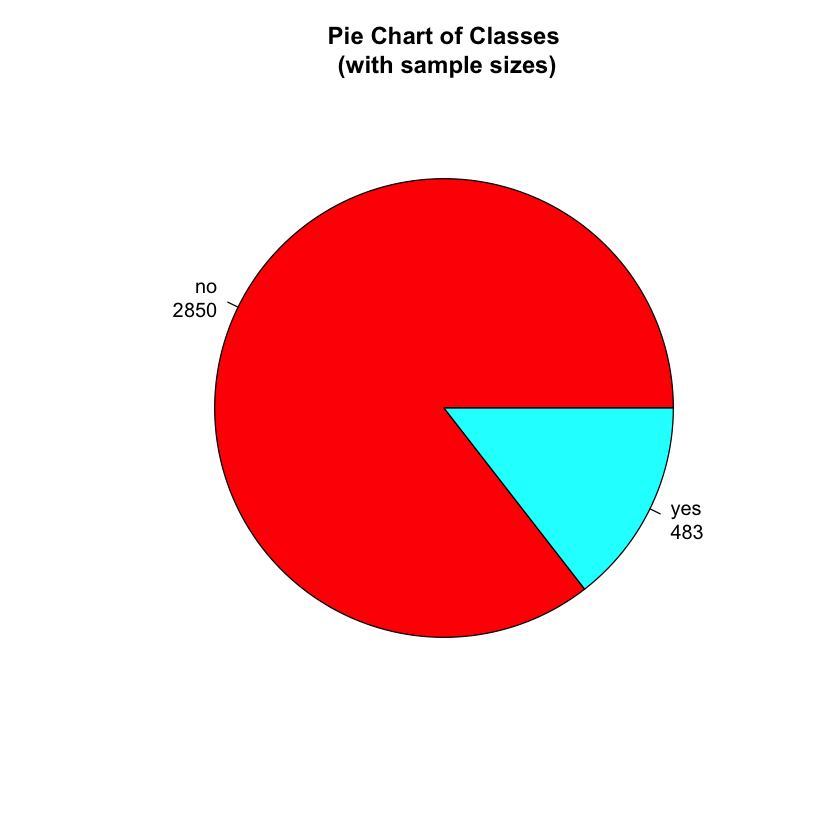

In [37]:
# Pie Chart from data 
mytable <- table(dataSet$Churn)
lbls <- paste(names(mytable), "\n", mytable, sep="")
pie(mytable, labels = lbls, col=rainbow(length(lbls)), 
    main="Pie Chart of Classes\n (with sample sizes)")

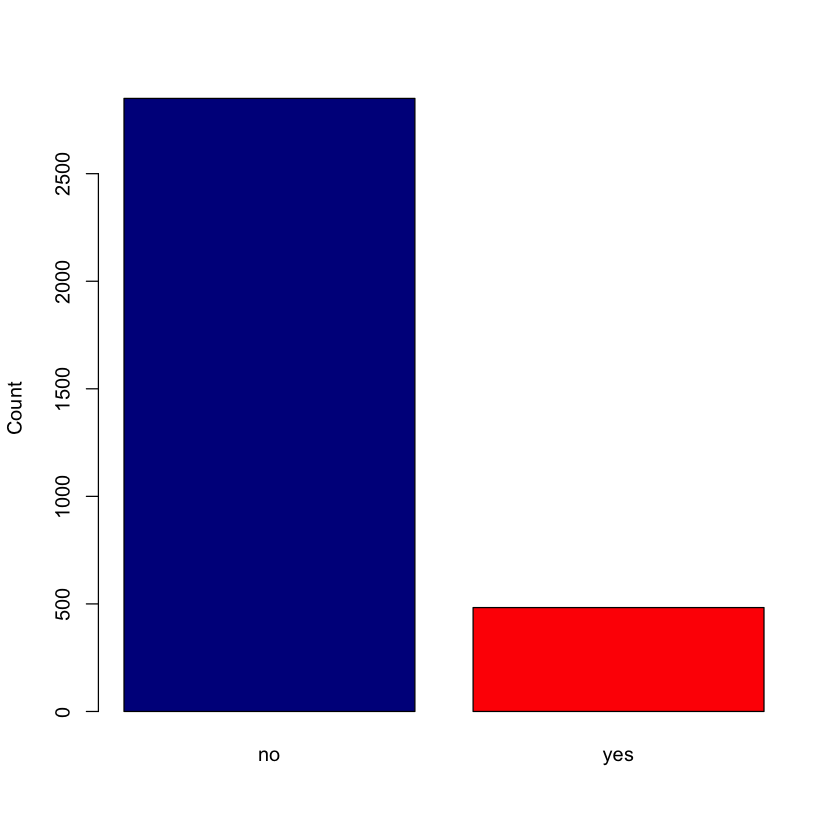

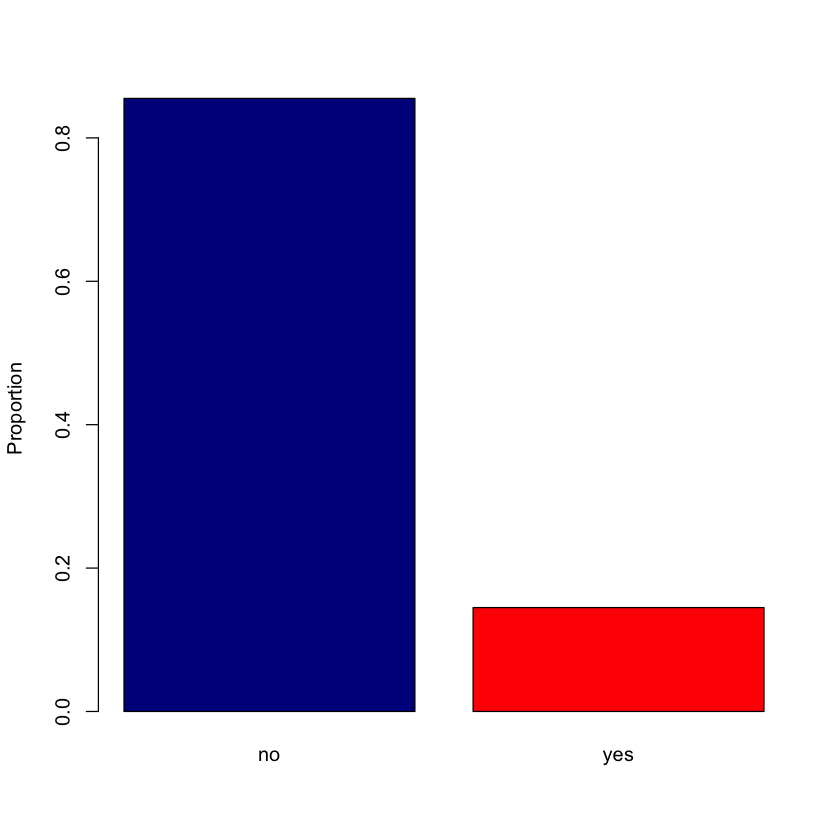

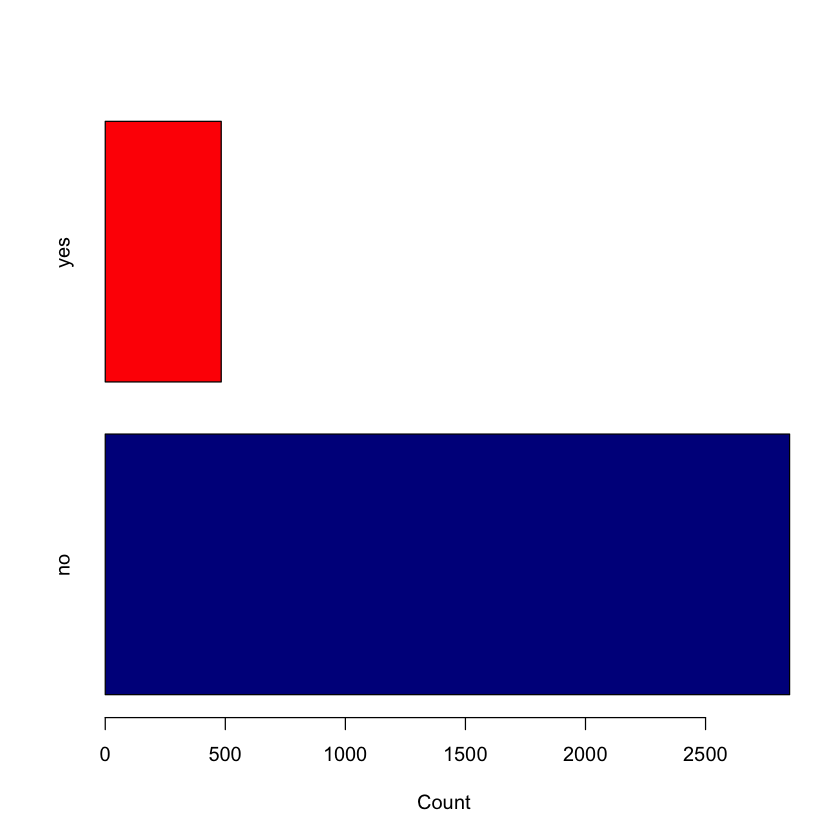

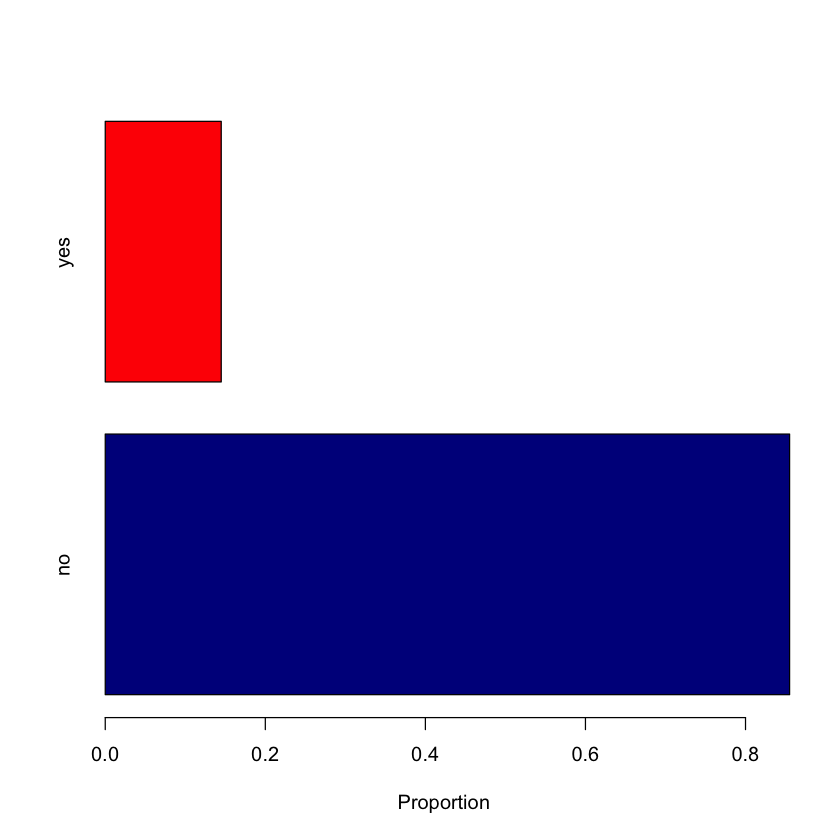

In [38]:
# Barplot of categorical data
par(mfrow=c(1,1))
barplot(table(dataSet$Churn), ylab = "Count", 
        col=c("darkblue","red"))
barplot(prop.table(table(dataSet$Churn)), ylab = "Proportion", 
        col=c("darkblue","red"))
barplot(table(dataSet$Churn), xlab = "Count", horiz = TRUE, 
        col=c("darkblue","red"))
barplot(prop.table(table(dataSet$Churn)), xlab = "Proportion", horiz = TRUE, 
        col=c("darkblue","red"))

Loading required package: cluster



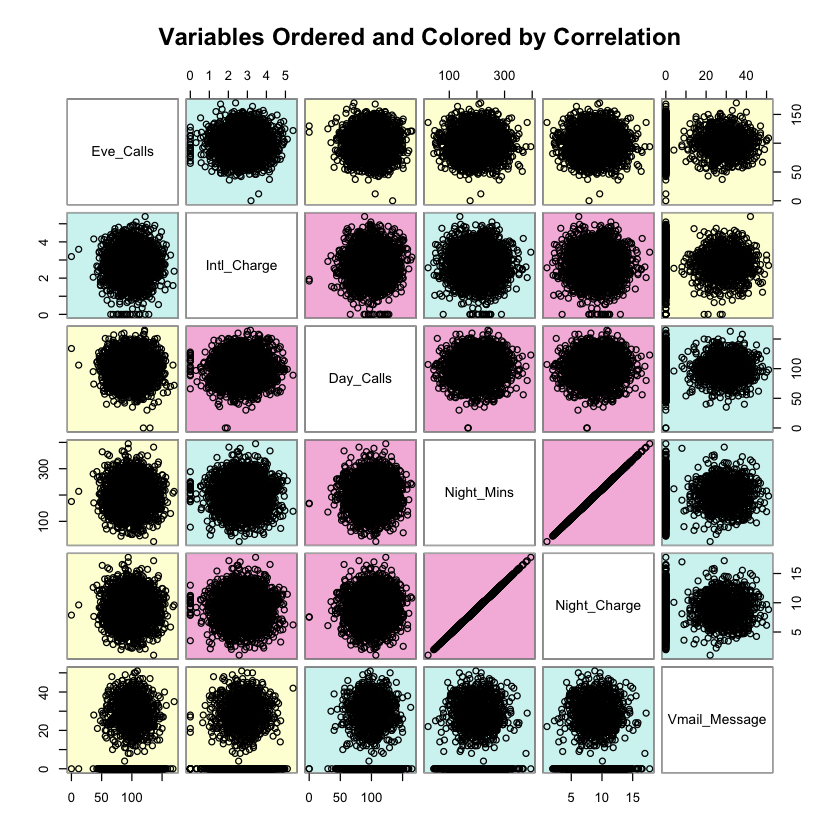

In [39]:
# Scatterplot Matrices from the glus Package 
library(gclus)
dta <- dataSet[c(2,5,11,13,16,18)] # get data 
dta.r <- abs(cor(dta)) # get correlations
dta.col <- dmat.color(dta.r) # get colors
# reorder variables so those with highest correlation are closest to the diagonal
dta.o <- order.single(dta.r) 
cpairs(dta, dta.o, panel.colors=dta.col, gap=.5, 
       main="Variables Ordered and Colored by Correlation" )

<h3>Visualise correlations</h3>

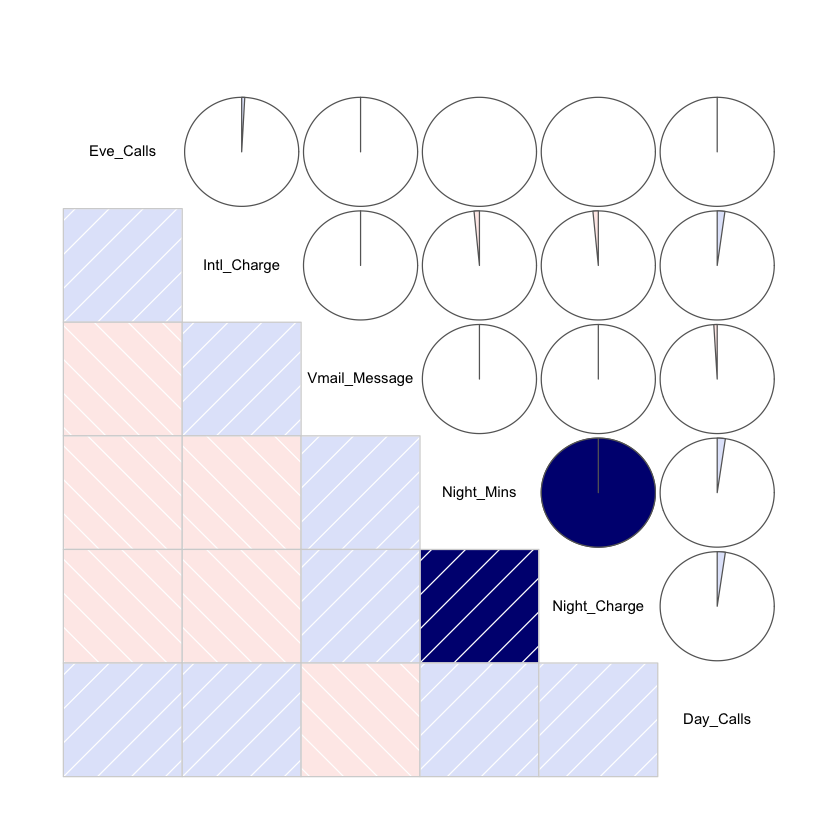

In [40]:
corrgram(dataSet[c(2,5,11,13,16,18)], order=TRUE, lower.panel=panel.shade,
         upper.panel=panel.pie, text.panel=panel.txt, main=" ")

In [41]:
# More graphs on correlatios amaong data
# Using "Hmisc"
res2 <- rcorr(as.matrix(dataSet[,c(2,5,11,13,16,18)]))
# Extract the correlation coefficients
res2$r
# Extract p-values
res2$P

,Vmail_Message,Night_Mins,Day_Calls,Eve_Calls,Night_Charge,Intl_Charge
Vmail_Message,1.000000000,0.007681136,-0.009548068,-0.005864351,0.007663290,0.002883658
Night_Mins,0.007681136,1.000000000,0.022937845,-0.002092768,0.999999215,-0.015179849
Day_Calls,-0.009548068,0.022937845,1.000000000,0.006462114,0.022926638,0.021666095
Eve_Calls,-0.005864351,-0.002092768,0.006462114,1.000000000,-0.002055984,0.008673858
Night_Charge,0.007663290,0.999999215,0.022926638,-0.002055984,1.000000000,-0.015186139
Intl_Charge,0.002883658,-0.015179849,0.021666095,0.008673858,-0.015186139,1.000000000


,Vmail_Message,Night_Mins,Day_Calls,Eve_Calls,Night_Charge,Intl_Charge
Vmail_Message,NA,0.6575570,0.5816089,0.7350335,0.6583020,0.8678283
Night_Mins,0.6575570,NA,0.1855268,0.9038694,0.0000000,0.3809828
Day_Calls,0.5816089,0.1855268,NA,0.7091964,0.1857418,0.2111142
Eve_Calls,0.7350335,0.9038694,0.7091964,NA,0.9055511,0.6166654
Night_Charge,0.6583020,0.0000000,0.1857418,0.9055511,NA,0.3807855
Intl_Charge,0.8678283,0.3809828,0.2111142,0.6166654,0.3807855,NA


corrplot 0.84 loaded



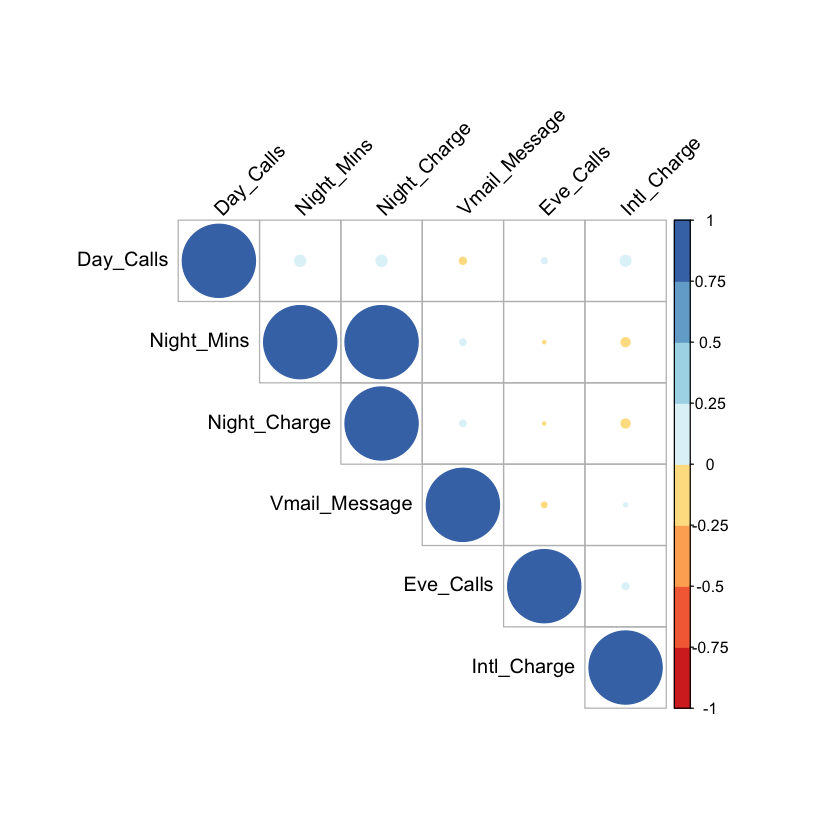

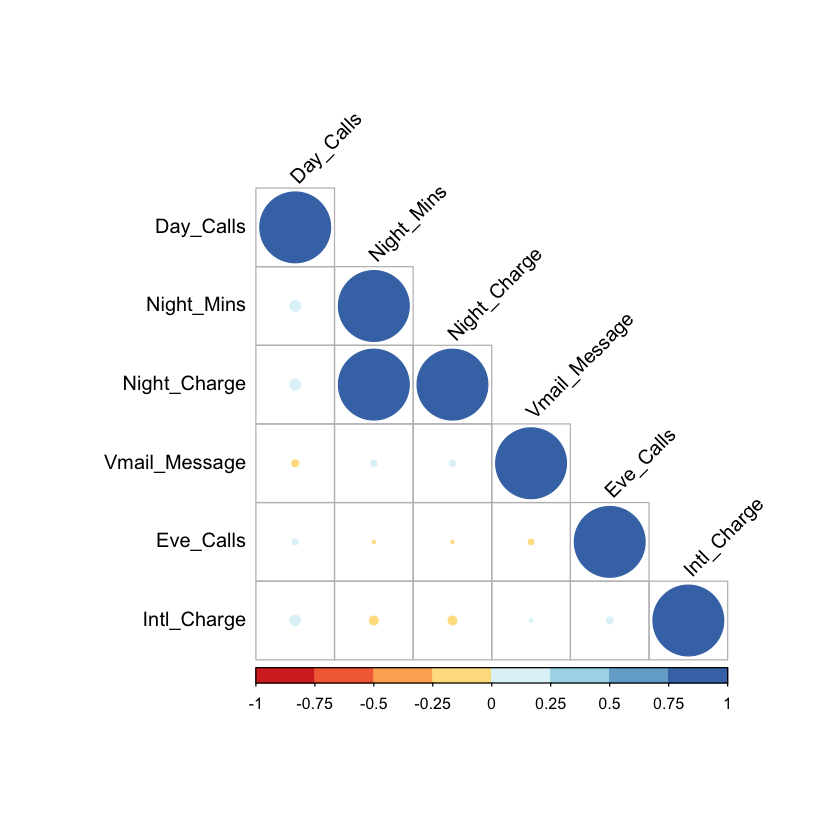

In [42]:
# Using "corrplot"
library(corrplot)
library(RColorBrewer)
corrplot(res2$r, type = "upper", order = "hclust", col=brewer.pal(n=8, name="RdYlBu"),
         tl.col = "black", tl.srt = 45)
corrplot(res2$r, type = "lower", order = "hclust", col=brewer.pal(n=8, name="RdYlBu"),
         tl.col = "black", tl.srt = 45)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘PerformanceAnalytics’


The following object is masked from ‘package:graphics’:

    legend




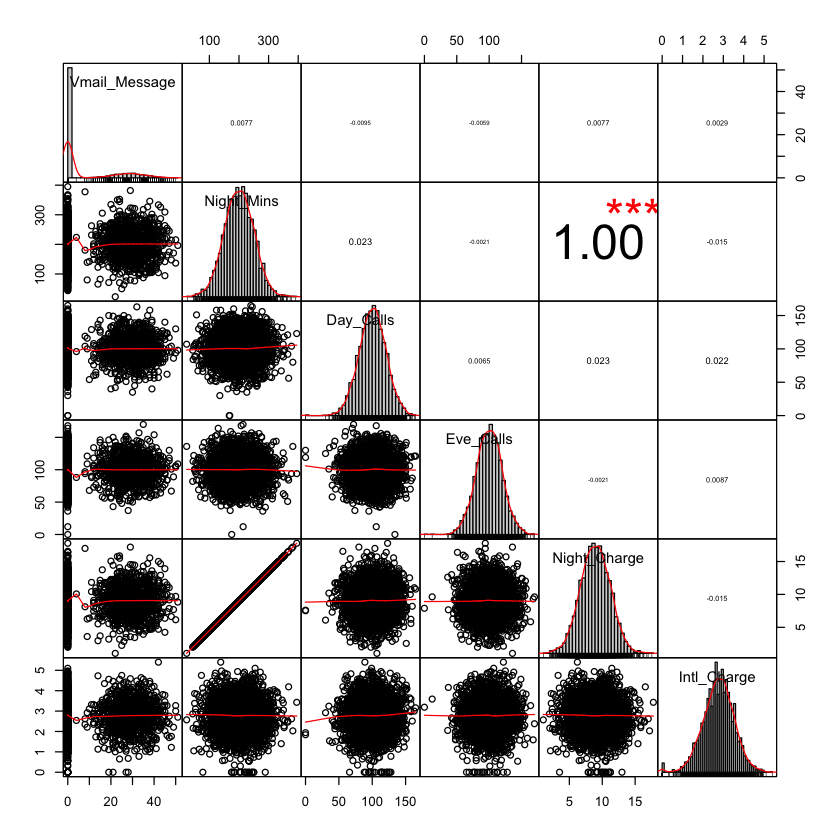

In [43]:
# Using PerformanceAnalytics
library(PerformanceAnalytics)
data <- dataSet[, c(2,5,11,13,16,18)]
chart.Correlation(data, histogram=TRUE, pch=19)

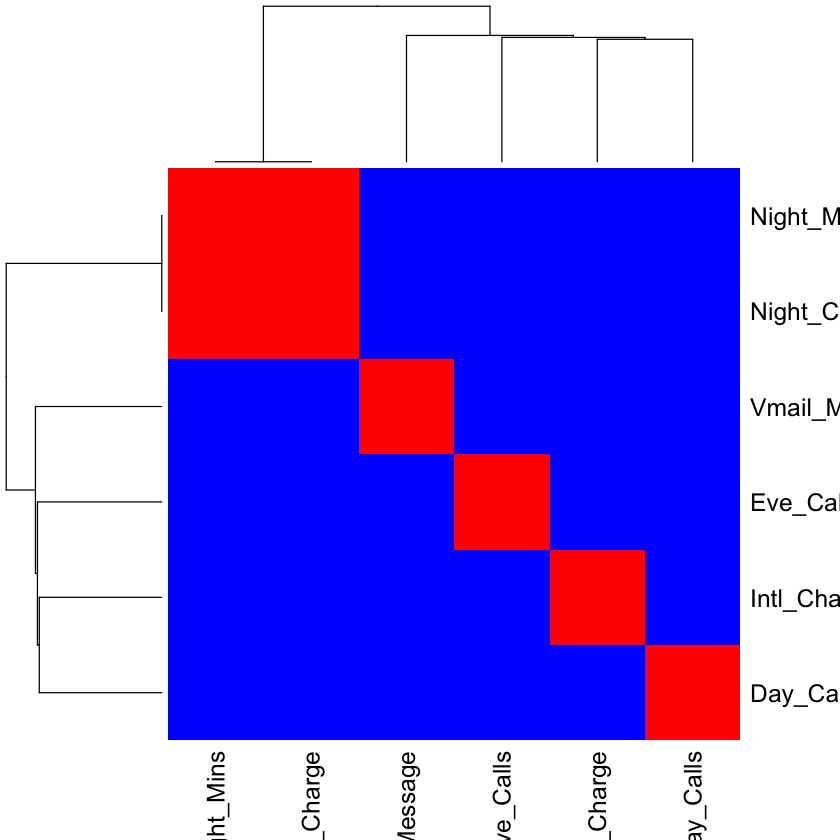

In [44]:
# Using Colored Headmap 
col <- colorRampPalette(c("blue", "white", "red"))(20)
heatmap(x = res2$r, col = col, symm = TRUE)

<p>We should notice that <b><i>Night_Mins</i></b> and <b><i>Night_Charge</i></b> have a strong, linear, positive relationship.</p>

## 6. Pre-Processing of DataSet i.e. train (75%) : test (25%) split

In [45]:
train_test_index <- createDataPartition(dataSet$Churn, p=0.75, list=FALSE)
training_dataset <- dataSet[, c(1:20)][train_test_index,]
testing_dataset  <- dataSet[, c(1:20)][-train_test_index,]

In [46]:
dim(training_dataset)
dim(testing_dataset)

[1] 2501   20

[1] 832  20

## 7. Cross Validation and control parameter setup

In [47]:
control <- trainControl(method="repeatedcv", # repeatedcv / adaptive_cv
                        number=2, repeats = 2, 
                        verbose = TRUE, search = "grid",
                        allowParallel = TRUE)
metric <- "Accuracy"
tuneLength = 2

## 8. Algorithm : LDA & LDA2

In [49]:
names(getModelInfo())

[1] "ada"                 "AdaBag"              "AdaBoost.M1"        
  [4] "adaboost"            "amdai"               "ANFIS"              
  [7] "avNNet"              "awnb"                "awtan"              
 [10] "bag"                 "bagEarth"            "bagEarthGCV"        
 [13] "bagFDA"              "bagFDAGCV"           "bam"                
 [16] "bartMachine"         "bayesglm"            "binda"              
 [19] "blackboost"          "blasso"              "blassoAveraged"     
 [22] "bridge"              "brnn"                "BstLm"              
 [25] "bstSm"               "bstTree"             "C5.0"               
 [28] "C5.0Cost"            "C5.0Rules"           "C5.0Tree"           
 [31] "cforest"             "chaid"               "CSimca"             
 [34] "ctree"               "ctree2"              "cubist"             
 [37] "dda"                 "deepboost"           "DENFIS"             
 [40] "dnn"                 "dwdLinear"           "dwdPoly"            
 [43] "dwdRadial"           "earth"               "elm"                
 [46] "enet"                "evtree"              "extraTrees"         
 [49] "fda"                 "FH.GBML"             "FIR.DM"             
 [52] "foba"                "FRBCS.CHI"           "FRBCS.W"            
 [55] "FS.HGD"              "gam"                 "gamboost"           
 [58] "gamLoess"            "gamSpline"           "gaussprLinear"      
 [61] "gaussprPoly"         "gaussprRadial"       "gbm_h2o"            
 [64] "gbm"                 "gcvEarth"            "GFS.FR.MOGUL"       
 [67] "GFS.LT.RS"           "GFS.THRIFT"          "glm.nb"             
 [70] "glm"                 "glmboost"            "glmnet_h2o"         
 [73] "glmnet"              "glmStepAIC"          "gpls"               
 [76] "hda"                 "hdda"                "hdrda"              
 [79] "HYFIS"               "icr"                 "J48"                
 [82] "JRip"                "kernelpls"           "kknn"               
 [85] "knn"                 "krlsPoly"            "krlsRadial"         
 [88] "lars"                "lars2"               "lasso"              
 [91] "lda"                 "lda2"                "leapBackward"       
 [94] "leapForward"         "leapSeq"             "Linda"              
 [97] "lm"                  "lmStepAIC"           "LMT"                
[100] "loclda"              "logicBag"            "LogitBoost"         
[103] "logreg"              "lssvmLinear"         "lssvmPoly"          
[106] "lssvmRadial"         "lvq"                 "M5"                 
[109] "M5Rules"             "manb"                "mda"                
[112] "Mlda"                "mlp"                 "mlpKerasDecay"      
[115] "mlpKerasDecayCost"   "mlpKerasDropout"     "mlpKerasDropoutCost"
[118] "mlpML"               "mlpSGD"              "mlpWeightDecay"     
[121] "mlpWeightDecayML"    "monmlp"              "msaenet"            
[124] "multinom"            "mxnet"               "mxnetAdam"          
[127] "naive_bayes"         "nb"                  "nbDiscrete"         
[130] "nbSearch"            "neuralnet"           "nnet"               
[133] "nnls"                "nodeHarvest"         "null"               
[136] "OneR"                "ordinalNet"          "ordinalRF"          
[139] "ORFlog"              "ORFpls"              "ORFridge"           
[142] "ORFsvm"              "ownn"                "pam"                
[145] "parRF"               "PART"                "partDSA"            
[148] "pcaNNet"             "pcr"                 "pda"                
[151] "pda2"                "penalized"           "PenalizedLDA"       
[154] "plr"                 "pls"                 "plsRglm"            
[157] "polr"                "ppr"                 "PRIM"               
[160] "protoclass"          "qda"                 "QdaCov"             
[163] "qrf"                 "qrnn"                "randomGLM"          
[166] "ranger"              "rbf"         

In [48]:
getModelInfo("pls"); getModelInfo("kknn"); getModelInfo("pda");

parameter,class,label
<chr>,<chr>,<chr>
K.prov,numeric,#Components
parameter,class,label
<chr>,<chr>,<chr>
ncomp,numeric,#Components
parameter,class,label
<chr>,<chr>,<chr>
mtry,numeric,#Randomly Selected Predictors
parameter,class,label
<chr>,<chr>,<chr>


parameter,class,label
<chr>,<chr>,<chr>
kmax,numeric,Max. #Neighbors
distance,numeric,Distance
kernel,character,Kernel


parameter,class,label
<chr>,<chr>,<chr>
lambda,numeric,Shrinkage Penalty Coefficient
parameter,class,label
<chr>,<chr>,<chr>
df,numeric,Degrees of Freedom


<h3>1) Training - without explicit parameter tuning / using default</h3>

In [51]:
# PLS
fit.pls <- caret::train(Churn~., data=training_dataset, method="pls", 
                        metric=metric, 
                        trControl=control,
                        verbose = TRUE
)
print(fit.pls)

Aggregating results
Selecting tuning parameters
Fitting ncomp = 1 on full training set
Partial Least Squares 

2501 samples
  19 predictor
   2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (2 fold, repeated 2 times) 
Summary of sample sizes: 1250, 1251, 1251, 1250 
Resampling results across tuning parameters:

  ncomp  Accuracy   Kappa
  1      0.8548582  0    
  2      0.8548582  0    
  3      0.8548582  0    

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was ncomp = 1.


In [53]:
# KKNN
fit.kknn <- caret::train(Churn~., data=training_dataset, method="kknn", 
                         metric=metric, 
                         trControl=control,
                         verbose = TRUE
)
print(fit.kknn)

Aggregating results
Selecting tuning parameters
Fitting kmax = 9, distance = 2, kernel = optimal on full training set
k-Nearest Neighbors 

2501 samples
  19 predictor
   2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (2 fold, repeated 2 times) 
Summary of sample sizes: 1250, 1251, 1250, 1251 
Resampling results across tuning parameters:

  kmax  Accuracy   Kappa    
  5     0.8762510  0.3732125
  7     0.8766512  0.3661114
  9     0.8774505  0.3507773

Tuning parameter 'distance' was held constant at a value of 2
Tuning
 parameter 'kernel' was held constant at a value of optimal
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were kmax = 9, distance = 2 and kernel
 = optimal.


In [55]:
# PDA
fit.pda <- caret::train(Churn~., data=training_dataset, method="pda", 
                        metric=metric, 
                        trControl=control,
                        verbose = TRUE
)
print(fit.pda)

Aggregating results
Selecting tuning parameters
Fitting lambda = 0.1 on full training set
Penalized Discriminant Analysis 

2501 samples
  19 predictor
   2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (2 fold, repeated 2 times) 
Summary of sample sizes: 1250, 1251, 1250, 1251 
Resampling results across tuning parameters:

  lambda  Accuracy   Kappa    
  0e+00   0.8536588  0.2701071
  1e-04   0.8536588  0.2701071
  1e-01   0.8548588  0.2750280

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was lambda = 0.1.


<h3>2) Training - with explicit parameter tuning using preProcess method</h3>

In [56]:
# PLS
fit.pls_preProc <- caret::train(Churn~., data=training_dataset, method="pls", 
                                metric=metric, 
                                trControl=control,
                                preProc=c("center", "scale"), 
                                verbose = TRUE
)
print(fit.pls_preProc)

Aggregating results
Selecting tuning parameters
Fitting ncomp = 1 on full training set
Partial Least Squares 

2501 samples
  19 predictor
   2 classes: 'no', 'yes' 

Pre-processing: centered (19), scaled (19) 
Resampling: Cross-Validated (2 fold, repeated 2 times) 
Summary of sample sizes: 1251, 1250, 1250, 1251 
Resampling results across tuning parameters:

  ncomp  Accuracy   Kappa     
  1      0.8614552  0.09858137
  2      0.8602552  0.15191354
  3      0.8606552  0.15978440

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was ncomp = 1.


In [57]:
# KKNN
fit.kknn_preProc <- caret::train(Churn~., data=training_dataset, method="kknn", 
                                 metric=metric, 
                                 trControl=control,
                                 preProc=c("center", "scale", "pca"), 
                                 verbose = TRUE
)
print(fit.kknn_preProc)

Aggregating results
Selecting tuning parameters
Fitting kmax = 9, distance = 2, kernel = optimal on full training set
k-Nearest Neighbors 

2501 samples
  19 predictor
   2 classes: 'no', 'yes' 

Pre-processing: centered (19), scaled (19), principal component
 signal extraction (19) 
Resampling: Cross-Validated (2 fold, repeated 2 times) 
Summary of sample sizes: 1251, 1250, 1251, 1250 
Resampling results across tuning parameters:

  kmax  Accuracy   Kappa    
  5     0.8748494  0.3529289
  7     0.8766488  0.3446831
  9     0.8780476  0.3491199

Tuning parameter 'distance' was held constant at a value of 2
Tuning
 parameter 'kernel' was held constant at a value of optimal
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were kmax = 9, distance = 2 and kernel
 = optimal.


In [58]:
# PDA
fit.pda_preProc <- caret::train(Churn~., data=training_dataset, method="pda", 
                                metric=metric, 
                                trControl=control,
                                preProc=c("center", "scale", "pca"), 
                                verbose = TRUE
)
print(fit.pda_preProc)

Aggregating results
Selecting tuning parameters
Fitting lambda = 0 on full training set
Penalized Discriminant Analysis 

2501 samples
  19 predictor
   2 classes: 'no', 'yes' 

Pre-processing: centered (19), scaled (19), principal component
 signal extraction (19) 
Resampling: Cross-Validated (2 fold, repeated 2 times) 
Summary of sample sizes: 1251, 1250, 1251, 1250 
Resampling results across tuning parameters:

  lambda  Accuracy   Kappa    
  0e+00   0.8576577  0.2271001
  1e-04   0.8576577  0.2271001
  1e-01   0.8576577  0.2271001

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was lambda = 0.


<h3>3) Training - with explicit parameter tuning using preProcess method & Automatic Grid i.e. tuneLength</h3>

In [59]:
# PLS
fit.pls_automaticGrid <- caret::train(Churn~., data=training_dataset, method="pls", 
                                      metric=metric, 
                                      trControl=control,
                                      preProc=c("center", "scale"), 
                                      tuneLength = tuneLength,
                                      verbose = TRUE
)
print(fit.pls_automaticGrid)

Aggregating results
Selecting tuning parameters
Fitting ncomp = 1 on full training set
Partial Least Squares 

2501 samples
  19 predictor
   2 classes: 'no', 'yes' 

Pre-processing: centered (19), scaled (19) 
Resampling: Cross-Validated (2 fold, repeated 2 times) 
Summary of sample sizes: 1250, 1251, 1251, 1250 
Resampling results across tuning parameters:

  ncomp  Accuracy   Kappa    
  1      0.8624550  0.1047710
  2      0.8608561  0.1550857

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was ncomp = 1.


In [60]:
# KKNN
fit.kknn_automaticGrid <- caret::train(Churn~., data=training_dataset, method="kknn", 
                                       metric=metric, 
                                       trControl=control,
                                       preProc=c("center", "scale", "pca"), 
                                       tuneLength = tuneLength,
                                       verbose = TRUE
)
print(fit.kknn_automaticGrid)

Aggregating results
Selecting tuning parameters
Fitting kmax = 7, distance = 2, kernel = optimal on full training set
k-Nearest Neighbors 

2501 samples
  19 predictor
   2 classes: 'no', 'yes' 

Pre-processing: centered (19), scaled (19), principal component
 signal extraction (19) 
Resampling: Cross-Validated (2 fold, repeated 2 times) 
Summary of sample sizes: 1250, 1251, 1251, 1250 
Resampling results across tuning parameters:

  kmax  Accuracy   Kappa    
  5     0.8702539  0.3245917
  7     0.8714528  0.3045254

Tuning parameter 'distance' was held constant at a value of 2
Tuning
 parameter 'kernel' was held constant at a value of optimal
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were kmax = 7, distance = 2 and kernel
 = optimal.


In [61]:
# PDA
fit.pda_automaticGrid <- caret::train(Churn~., data=training_dataset, method="pda", 
                                      metric=metric, 
                                      trControl=control,
                                      preProc=c("center", "scale", "pca"), 
                                      tuneLength = tuneLength,
                                      verbose = TRUE
)
print(fit.pda_automaticGrid)

Aggregating results
Selecting tuning parameters
Fitting lambda = 0 on full training set
Penalized Discriminant Analysis 

2501 samples
  19 predictor
   2 classes: 'no', 'yes' 

Pre-processing: centered (19), scaled (19), principal component
 signal extraction (19) 
Resampling: Cross-Validated (2 fold, repeated 2 times) 
Summary of sample sizes: 1250, 1251, 1250, 1251 
Resampling results across tuning parameters:

  lambda  Accuracy   Kappa    
  0.0     0.8544596  0.2195928
  0.1     0.8544596  0.2195928

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was lambda = 0.


<h3>4) Training - with explicit parameter tuning using preProcess method & Manual Grid i.e. tuneGrid</h3>

<p>Grid needs to parameterise manually for each particular algorithm</p>

Aggregating results
Selecting tuning parameters
Fitting ncomp = 1 on full training set
Partial Least Squares 

2501 samples
  19 predictor
   2 classes: 'no', 'yes' 

Pre-processing: centered (19), scaled (19) 
Resampling: Cross-Validated (2 fold, repeated 2 times) 
Summary of sample sizes: 1251, 1250, 1250, 1251 
Resampling results across tuning parameters:

  ncomp  Accuracy   Kappa    
  1.0    0.8642550  0.1251190
  1.5    0.8642550  0.1251190
  2.0    0.8618568  0.1671640
  2.5    0.8618568  0.1671640
  3.0    0.8624561  0.1716716
  3.5    0.8624561  0.1716716
  4.0    0.8624563  0.1716890

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was ncomp = 1.


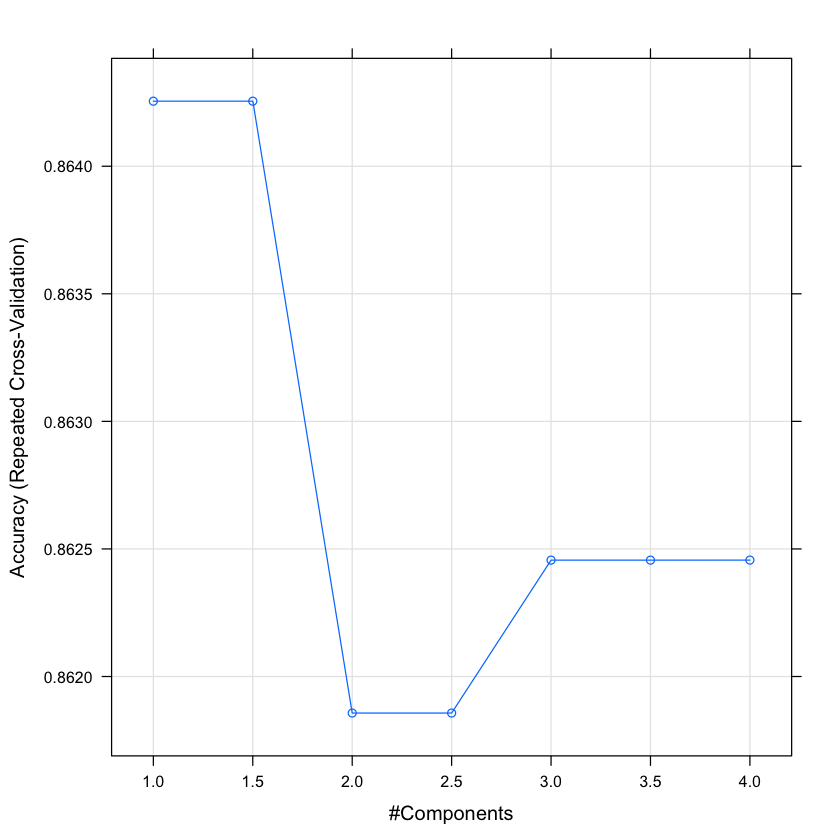

In [62]:
# PLS
grid <- expand.grid(ncomp=c(seq(from = 1, to = 4, by = 0.5)))
fit.pls_manualGrid <- caret::train(Churn~., data=training_dataset, method="pls", 
                                   metric=metric, 
                                   trControl=control,
                                   preProc=c("center", "scale"), 
                                   tuneGrid = grid,
                                   verbose = TRUE
)
print(fit.pls_manualGrid)
plot(fit.pls_manualGrid)

Aggregating results
Selecting tuning parameters
Fitting kmax = 10, distance = 3, kernel = triangular on full training set
k-Nearest Neighbors 

2501 samples
  19 predictor
   2 classes: 'no', 'yes' 

Pre-processing: centered (19), scaled (19), principal component
 signal extraction (19) 
Resampling: Cross-Validated (2 fold, repeated 2 times) 
Summary of sample sizes: 1251, 1250, 1250, 1251 
Resampling results across tuning parameters:

  kmax  distance  kernel        Accuracy   Kappa    
   1    1         rectangular   0.8420614  0.3014900
   1    1         triangular    0.8420614  0.3014900
   1    1         epanechnikov  0.8420614  0.3014900
   1    3         rectangular   0.8522582  0.3417751
   1    3         triangular    0.8522582  0.3417751
   1    3         epanechnikov  0.8522582  0.3417751
   1    5         rectangular   0.8470596  0.3287266
   1    5         triangular    0.8470596  0.3287266
   1    5         epanechnikov  0.8470596  0.3287266
   1    7         rectangular 

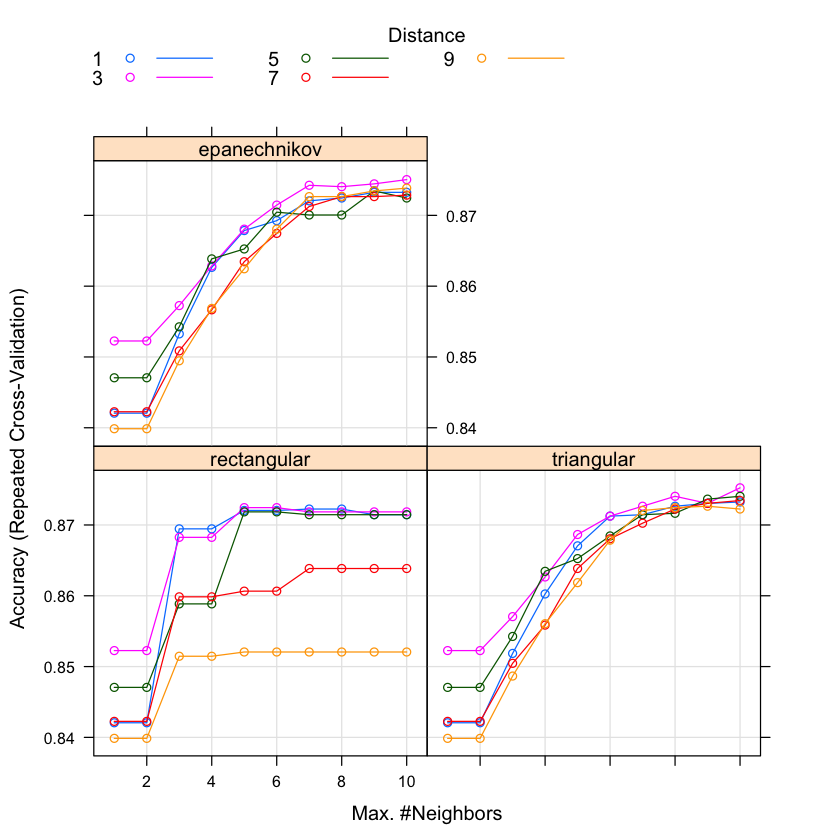

In [63]:
# KKNN
grid <- expand.grid(kmax      = c(seq(from = 1, to = 10, by = 1)),
                    distance  = c(seq(from = 1, to = 10, by = 2)),
                    kernel    = c("rectangular", "triangular","epanechnikov")
)
fit.kknn_manualGrid <- caret::train(Churn~., data=training_dataset, method="kknn", 
                                    metric=metric, 
                                    trControl=control,
                                    preProc=c("center", "scale", "pca"), 
                                    tuneGrid = grid,
                                    verbose = TRUE
)
print(fit.kknn_manualGrid)
plot(fit.kknn_manualGrid)

Aggregating results
Selecting tuning parameters
Fitting lambda = 0.1 on full training set
Penalized Discriminant Analysis 

2501 samples
  19 predictor
   2 classes: 'no', 'yes' 

Pre-processing: centered (19), scaled (19), principal component
 signal extraction (19) 
Resampling: Cross-Validated (2 fold, repeated 2 times) 
Summary of sample sizes: 1251, 1250, 1250, 1251 
Resampling results across tuning parameters:

  lambda  Accuracy   Kappa    
  0.1     0.8568579  0.2011181
  0.3     0.8568579  0.2011181
  0.5     0.8568579  0.2011181
  0.7     0.8568579  0.2011181
  0.9     0.8568579  0.2011181

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was lambda = 0.1.


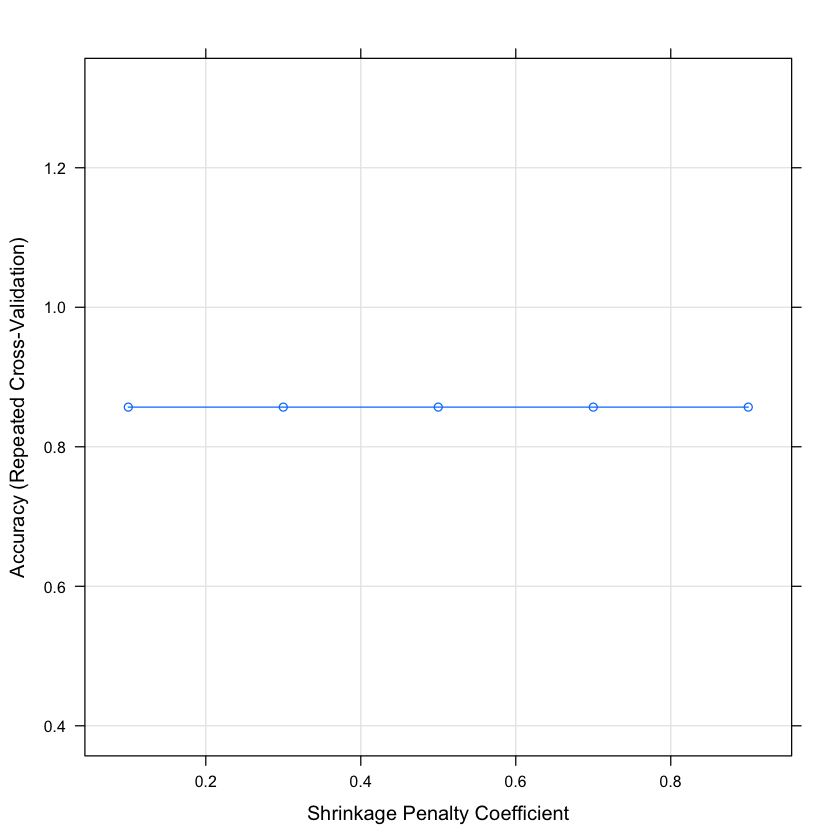

In [64]:
# PDA
grid <- expand.grid(lambda = c(seq(from = 0.1, to = 1.0, by = 0.2)))
fit.pda_manualGrid <- caret::train(Churn~., data=training_dataset, method="pda", 
                                   metric=metric, 
                                   trControl=control,
                                   preProc=c("center", "scale", "pca"), 
                                   tuneGrid = grid,
                                   verbose = TRUE
)
print(fit.pda_manualGrid)
plot(fit.pda_manualGrid)

<h3>Collect the results of trained models</h3>

In [65]:
results <- resamples(list(    trained_Model_1  = fit.pls
                              , trained_Model_2  = fit.kknn
                              , trained_Model_3  = fit.pda
                              
                              , trained_Model_4  = fit.pls_preProc
                              , trained_Model_5  = fit.kknn_preProc
                              , trained_Model_6  = fit.pda_preProc
                              
                              , trained_Model_7  = fit.pls_automaticGrid
                              , trained_Model_8  = fit.kknn_automaticGrid
                              , trained_Model_9  = fit.pda_automaticGrid
                              
                              , trained_Model_10 = fit.pls_manualGrid
                              , trained_Model_11 = fit.kknn_manualGrid
                              , trained_Model_12 = fit.pda_manualGrid
))

<h3>Summarize the fitted models</h3>

In [66]:
summary(results)


Call:
summary.resamples(object = results)

Models: trained_Model_1, trained_Model_2, trained_Model_3, trained_Model_4, trained_Model_5, trained_Model_6, trained_Model_7, trained_Model_8, trained_Model_9, trained_Model_10, trained_Model_11, trained_Model_12 
Number of resamples: 4 

Accuracy 
                      Min.   1st Qu.    Median      Mean   3rd Qu.      Max.
trained_Model_1  0.8545164 0.8545164 0.8548582 0.8548582 0.8552000 0.8552000
trained_Model_2  0.8713030 0.8749001 0.8776496 0.8774505 0.8802000 0.8832000
trained_Model_3  0.8497202 0.8544301 0.8560576 0.8548588 0.8564863 0.8576000
trained_Model_4  0.8600000 0.8606835 0.8612556 0.8614552 0.8620273 0.8633094
trained_Model_5  0.8680000 0.8740743 0.8792496 0.8780476 0.8832229 0.8856914
trained_Model_6  0.8521183 0.8568296 0.8588563 0.8576577 0.8596844 0.8608000
trained_Model_7  0.8608000 0.8620825 0.8625100 0.8624550 0.8628825 0.8640000
trained_Model_8  0.8681055 0.8681055 0.8696528 0.8714528 0.8730000 0.8784000
trained_Model

<h3>Plot and rank the fitted models</h3>

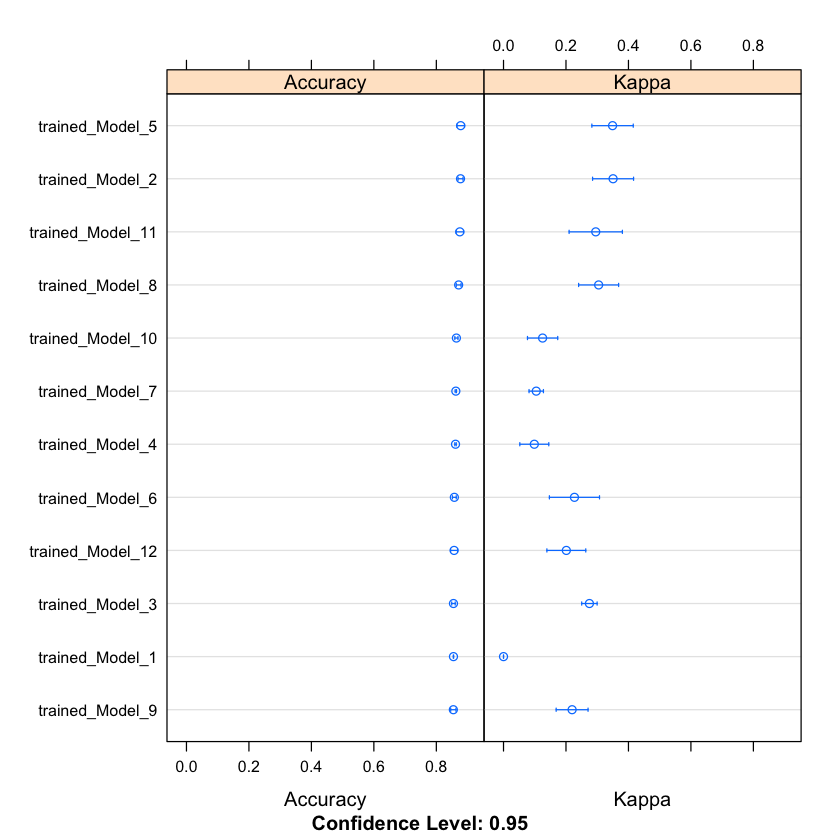

In [67]:
dotplot(results)

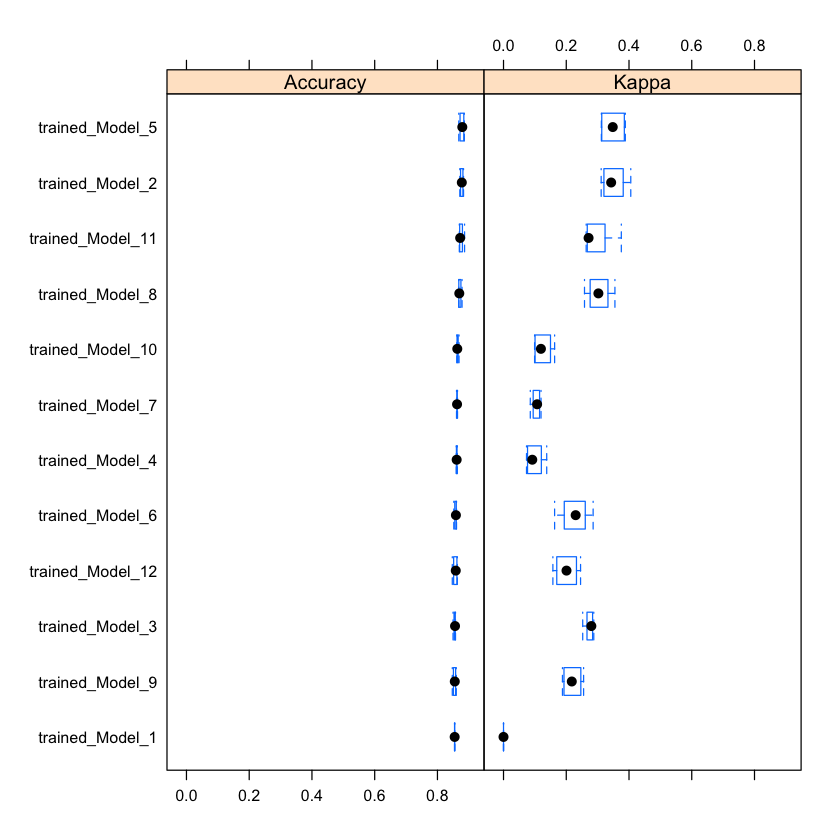

In [68]:
bwplot(results)

<h3>Assign the best trained model based on Accuracy</h3>

In [69]:
best_trained_model <- fit.pda_automaticGrid

## 9. Test skill of the BEST trained model on validation/testing dataset 

In [71]:
predictions <- predict(best_trained_model, newdata=testing_dataset)

<h3>Evaluate the BEST trained model and print results</h3>

In [72]:
res_  <- caret::confusionMatrix(table(predictions, testing_dataset$Churn))
print("Results from the BEST trained model ... ...\n"); 
print(round(res_$overall, digits = 3))

[1] "Results from the BEST trained model ... ...\n"
      Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
         0.864          0.196          0.839          0.887          0.856 
AccuracyPValue  McnemarPValue 
         0.263          0.000 


## 10. Save the model to disk

In [73]:
#getwd()
saveRDS(best_trained_model, "./best_trained_model.rds")

In [74]:
# load the model
#getwd()
saved_model <- readRDS("./best_trained_model.rds")
print(saved_model)

Penalized Discriminant Analysis 

2501 samples
  19 predictor
   2 classes: 'no', 'yes' 

Pre-processing: centered (19), scaled (19), principal component
 signal extraction (19) 
Resampling: Cross-Validated (2 fold, repeated 2 times) 
Summary of sample sizes: 1250, 1251, 1250, 1251 
Resampling results across tuning parameters:

  lambda  Accuracy   Kappa    
  0.0     0.8544596  0.2195928
  0.1     0.8544596  0.2195928

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was lambda = 0.


In [75]:
# make a predictions on "new data" using the final model
final_predictions <- predict(saved_model, dataSet[1:20])
confusionMatrix(table(final_predictions, dataSet$Churn))
res_ <- confusionMatrix(table(final_predictions, dataSet$Churn))
print("Results from the BEST trained model ... ...\n"); 
print(round(res_$overall, digits = 3))

Confusion Matrix and Statistics

                 
final_predictions   no  yes
              no  2796  414
              yes   54   69
                                          
               Accuracy : 0.8596          
                 95% CI : (0.8473, 0.8712)
    No Information Rate : 0.8551          
    P-Value [Acc > NIR] : 0.2387          
                                          
                  Kappa : 0.1795          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9811          
            Specificity : 0.1429          
         Pos Pred Value : 0.8710          
         Neg Pred Value : 0.5610          
             Prevalence : 0.8551          
         Detection Rate : 0.8389          
   Detection Prevalence : 0.9631          
      Balanced Accuracy : 0.5620          
                                          
       'Positive' Class : no              
     

[1] "Results from the BEST trained model ... ...\n"
      Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
         0.860          0.179          0.847          0.871          0.855 
AccuracyPValue  McnemarPValue 
         0.239          0.000 


                 
final_predictions   no  yes
              no  2796  414
              yes   54   69


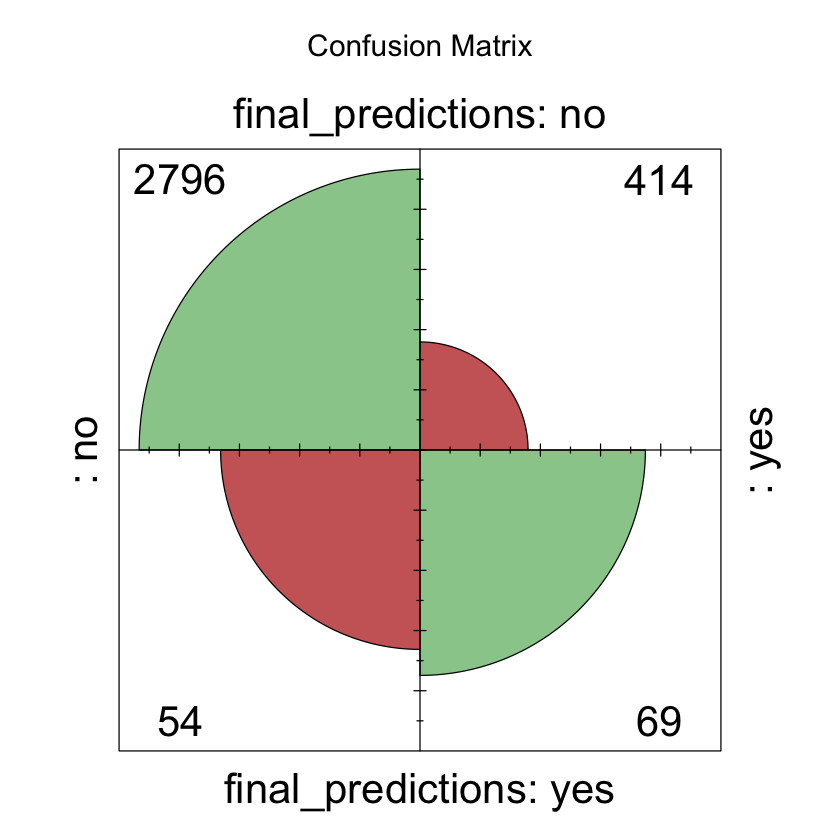

In [76]:
print(res_$table)
fourfoldplot(res_$table, color = c("#CC6666", "#99CC99"),
             conf.level = 0, margin = 1, main = "Confusion Matrix")

## REFERENCES

<ol>
    <li><a href="https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm"><i>k-nearest neighbors algorithm
</i></a></li>
    <li><a href="https://en.wikipedia.org/wiki/Partial_least_squares_regression">Partial least squares regression</a>
    </li>
    <li><a href="http://gforge.se/2015/02/how-to-go-parallel-in-r-basics-tips/"><i>Code parallelizing in R</i></a></li>
</ol>